In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1: What are the 5 most popular trips that you would call "commuter trips"?

LOAD DATA FRAMES:

In [51]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_evening_trips`' > pop_evening_trips.csv

Waiting on bqjob_r73c4d718cac995cd_00000174f521264c_1 ... (0s) Current status: DONE   


In [52]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_evening_trips_subscribers`' > pop_evening_trips_subscribers.csv

Waiting on bqjob_r36130bf23855867d_00000174f5212dc4_1 ... (0s) Current status: DONE   


In [53]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_morning_trips`' > pop_morning_trips.csv

Waiting on bqjob_r4c54c45527a06781_00000174f5213546_1 ... (0s) Current status: DONE   


In [54]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_morning_trips_subscribers`' > pop_morning_trips_subscribers.csv

Waiting on bqjob_r6cac44c91bf74454_00000174f5213c46_1 ... (0s) Current status: DONE   


In [55]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_trips`' > most_popular_trips.csv

Waiting on bqjob_r3a0dc691624a0742_00000174f5214383_1 ... (0s) Current status: DONE   


In [56]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.5_most_popular_trips_subscribers`' > most_popular_trips_subscribers.csv

Waiting on bqjob_r49ce7a954fcd9f6_00000174f5214a99_1 ... (0s) Current status: DONE   


In [57]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.num_trips_for_hour_subscriber`' > customer_v_subscriber.csv

Waiting on bqjob_r774b3ac5b120a102_00000174f521530f_1 ... (0s) Current status: DONE   


In [58]:
pop_evening_trips, pop_evening_trips_subscribers = pd.read_csv('pop_evening_trips.csv'), pd.read_csv('pop_evening_trips_subscribers.csv')

In [59]:
pop_morning_trips, pop_morning_trips_subscribers = pd.read_csv('pop_morning_trips.csv'), pd.read_csv('pop_morning_trips_subscribers.csv')

In [60]:
most_popular_trips, most_popular_trips_subscribers = pd.read_csv('most_popular_trips.csv'), pd.read_csv('most_popular_trips_subscribers.csv')

In [71]:
customerVSsubscriber = pd.read_csv('customer_v_subscriber.csv')

## The 5 most popular trips called commuter trips are from: 
   ### Harry Bridges Plaza to Embarcadero at Sansome
   ### San Francisco Cal Train 2 to Townsend at 7th
   ### 2nd at Townsend to Harry Bridges Plaza
   ### Harry Bridges Plaza to 2nd Townsend
   ### Embarcadero at Sansome to Steuart at Market

Overall:

In [240]:
most_popular_trips

,start_station_name,end_station_name,top_5_commutes
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


In the evening:

In [63]:
pop_evening_trips

,start_station_name,end_station_name,number_evening_commutes
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4456
1,Embarcadero at Sansome,Steuart at Market,4282
2,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4180
3,2nd at South Park,Market at Sansome,3573
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3567


And in the morning:

In [64]:
pop_morning_trips

,start_station_name,end_station_name,number_morning_commutes
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4842
1,Steuart at Market,2nd at Townsend,3837
2,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3817
3,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3622
4,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3620


### Most commuters are likely to be subscribers because they rely on the bikeshare system to commute daily, so it is cheaper for them to subscribe then pay as a regular customer everyday. These are the 5 most popular trips for subscribers:

#### Here is a bar graph to visualize the number of trips taken by customers vs. subscribers throughout the day. Subscribers makeup the most trips throughout the day, especially during commuter hours- around 8 AM and 5 PM. The tables following this graph illustrate this idea.

In [291]:
customerVSsubscriber_for_plot = customerVSsubscriber.pivot(index= 'hour_of_day', columns = 'subscriber_type', values = 'count_trips_taken')

<AxesSubplot:xlabel='hour_of_day'>

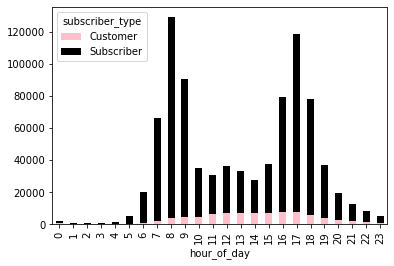

In [292]:
customerVSsubscriber_for_plot.plot.bar(stacked = True, color = {'Customer': 'pink', 'Subscriber': 'black'})

Overall:

In [296]:
most_popular_trips_subscribers

,start_station_name,end_station_name,top_5_commutes
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8305
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6931
2,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6641
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6332
4,Embarcadero at Sansome,Steuart at Market,6200


In the evening:

In [294]:
pop_evening_trips_subscribers

,start_station_name,end_station_name,number_evening_commutes
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4268
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4088
2,Embarcadero at Sansome,Steuart at Market,4009
3,2nd at South Park,Market at Sansome,3510
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3469


And in the morning:

In [297]:
pop_morning_trips_subscribers

,start_station_name,end_station_name,number_morning_commutes
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4774
1,Steuart at Market,2nd at Townsend,3786
2,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3779
3,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3599
4,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3567


# Question 2: What are your recommendations for offers (justify based on your findings)?

## QUESTION 2 PART A: Bike Trips on the 6 Most Popular Holidays

LOAD DATA FRAMES

In [298]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.christmas_bikes`' > christmas.csv
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.thanksgiving`' > thanksgiving.csv
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.halloween_bikes`' > halloween.csv
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.valentinesday_bikes`' > valentinesday.csv
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.easter`' > easter.csv
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.st_pattys`' > stpattys.csv

Waiting on bqjob_r4d994677a76a6ece_00000174f5d27461_1 ... (0s) Current status: DONE   
Waiting on bqjob_r975a28428392d91_00000174f5d27bd9_1 ... (0s) Current status: DONE   
Waiting on bqjob_r5a2828a35a0214a3_00000174f5d282fd_1 ... (0s) Current status: DONE   
Waiting on bqjob_r6b197aa948a3d211_00000174f5d28a54_1 ... (0s) Current status: DONE   
Waiting on bqjob_r4fe570fdc7a5d770_00000174f5d29168_1 ... (0s) Current status: DONE   
Waiting on bqjob_r7eade6ffa8396063_00000174f5d29863_1 ... (0s) Current status: DONE   


In [299]:
christmas, thanksgiving, halloween, valentines, easter, stpattys = pd.read_csv('christmas.csv'), pd.read_csv('thanksgiving.csv'), pd.read_csv('halloween.csv'), pd.read_csv('valentinesday.csv'), pd.read_csv('easter.csv'), pd.read_csv('stpattys.csv')

In [300]:
holidays = [christmas, thanksgiving, halloween, valentines, easter, stpattys]
bars = ('Christmas', 'Thanksgiving', 'Halloween', 'Valentines Day', 'Easter', 'St. Pattys day')
heights = [x.loc[0]['f0_'] for x in holidays]

Text(0.5, 1.0, 'Number of Bikeshare Trips from 2014 to 2015 in the Bay Area on the Most Popular Holidays')

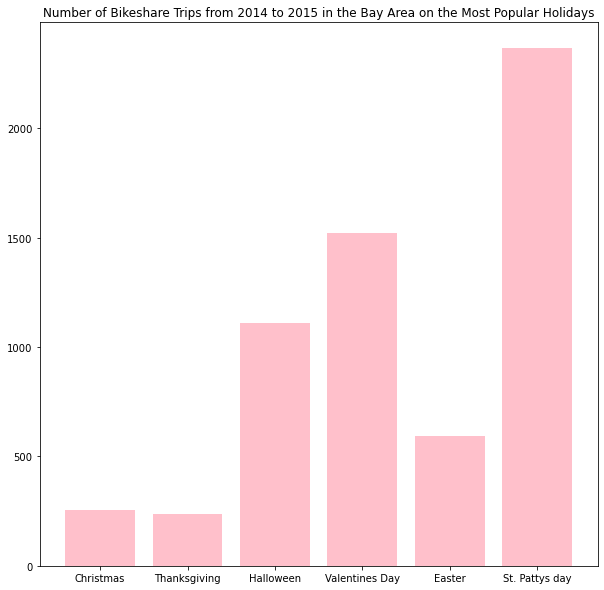

In [301]:
plt.figure(figsize= (10,10))
plt.bar(bars, heights, color = 'pink')
plt.title('Number of Bikeshare Trips from 2014 to 2015 in the Bay Area on the Most Popular Holidays')

#### Based on this bargraph, it is clear that bikesharing is far more popular on some holidays and less popular on others. From this analysis I recommend that we offer deals on holidays in which our platform is not as popular- namely Christmas, Thanksgiving, and Easter.

##### While we are undoubtably leaving money on the table on these 3 outlying holidays, it is important to note that Christmas, Thanksgiving, and Easter are all days that most workers have off. Therefore, there are far less people commuting to work on our bikes. Our customers on these days will likely not be subscribers but regular customers because subscribers use bikeshare mostly for commuting. The deals we offer must be targeted at non-subscribing customers who will be using bikeshare for leisure on these days.

## QUESTION 2 PART B: Least Popular Zipcodes

In [156]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.least_subscriber_zipcode`' > least_subscriber_zipcode.csv

Waiting on bqjob_r26ec11b3feb50d6d_00000174f575a8c3_1 ... (0s) Current status: DONE   


In [157]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.least_customers_zipcode`' > least_customer_zipcode.csv

Waiting on bqjob_r42bfd2b9f7e9812b_00000174f5760b17_1 ... (0s) Current status: DONE   


In [167]:
least_subscriber_zipcode, least_customer_zipcode = pd.read_csv('least_subscriber_zipcode.csv'), pd.read_csv('least_customer_zipcode.csv')

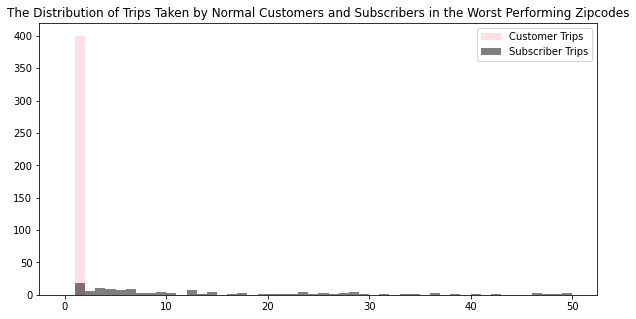

In [305]:
plt.figure(figsize = (10,5))
plt.hist(least_customer_zipcode['trips'], bins = 50, range = (0, 50) ,alpha = 0.5, color = 'pink', label = 'Customer Trips')
plt.hist(least_subscriber_zipcode['trips'], bins = 50, range = (0,50), alpha = 0.5, color = 'black', label = 'Subscriber Trips')
plt.title('The Distribution of Trips Taken by Normal Customers and Subscribers in the Worst Performing Zipcodes')
plt.legend(loc='upper right')

#### This histogram illustrates that in the worst performing zipcodes for regular customers, essentially all of these zipcodes have had only 1 trip. In contrast, the worst, zipcodes for subscribers have had up to 50 trips.

#### I recommend that in these poorly performing zipcodes, we increase advertisement or build new docking stations to maximize profits. The following tables illustrate that: there are over 400 zipcodes with just 1 'customer' taken trip & there are 70 zipcodes with less than 10 'subscriber' taken trip. These failing zipcodes should be targeted with ad campaigns and new deals.

In [194]:
least_customer_zipcode

,zip_code,trips
0,28043,1
1,37917,1
2,90059,1
3,77501,1
4,46703,1
...,...,...
395,941108,1
396,10588,1
397,7928,1
398,64083,1


In [195]:
least_subscriber_zipcode[least_subscriber_zipcode['trips'] < 10]

,zip_code,trips
0,20005,1
1,89138,1
2,37405,1
3,90404,1
4,2138,1
...,...,...
66,0,8
67,94142,9
68,95462,9
69,12533,9


## QUESTION 2 PART C:Bikes Available on the Weekend

In [196]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.available_bikes_on_weekend`' > available_weekend_bikes.csv

Waiting on bqjob_r65d931fc1bc88430_00000174f5888567_1 ... (15s) Current status: DONE   


In [197]:
available_weekend_bikes = pd.read_csv('available_weekend_bikes.csv')

In [199]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `new-project-288420.bike_trip_data.station_info`' > station_info.csv

Waiting on bqjob_r21b069b655794464_00000174f58ad539_1 ... (0s) Current status: DONE   


In [200]:
station_info = pd.read_csv('station_info.csv')

In [216]:
merged = pd.merge(left = station_info, right = available_weekend_bikes, how = 'left', left_on ='station_id', right_on = 'station_id')

In [225]:
san_jose = merged[merged['landmark'] == 'San Jose']
san_fran = merged[merged['landmark'] == 'San Francisco']
redwood_city = merged[merged['landmark'] == 'Redwood City']
mountain_view = merged[merged['landmark'] == 'Mountain View']
palo_alto = merged[merged['landmark'] == 'Palo Alto']

In [234]:
san_jose_bikes = san_jose['num_bikes'].sum()
san_fran_bikes = san_fran['num_bikes'].sum()
redwood_city_bikes = redwood_city['num_bikes'].sum()
mountain_view_bikes = mountain_view['num_bikes'].sum()
palo_alto_bikes = palo_alto['num_bikes'].sum()

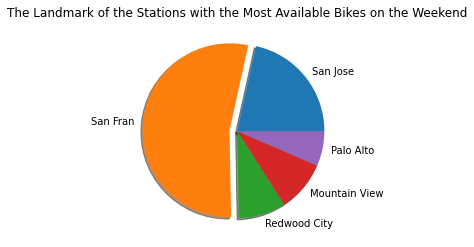

In [259]:
fig1, ax1 = plt.subplots()
ax1.pie([san_jose_bikes, san_fran_bikes, redwood_city_bikes, mountain_view_bikes, palo_alto_bikes], explode = (0,0.09,0,0,0), labels = ['San Jose', 'San Fran', 'Redwood City', 'Mountain View', 'Palo Alto'], shadow=True)
plt.title('The Landmark of the Stations with the Most Available Bikes on the Weekend')
plt.show()

#### This pie chart identifies regions where there are the highest count of available bikes on the weekend (Friday, Saturday, and Sunday). It is important to recognize that the number of stations located in each of these regions could indicate why there are more bikes available in some regions and less in others. However, to maximize profits we want to minimize the number of bikes available. Because San Francisco has largest proportion of available bikes on weekend days, we need to make offers to our customers in San Francisco on the days.

# APPENDIX

#### QUESTION 1
```sql
SELECT start_station_name, end_station_name, count(*) AS number_evening_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
    AND (EXTRACT(HOUR FROM start_date) < 20
    AND EXTRACT(HOUR FROM start_date) >= 16)
  GROUP BY start_station_name, end_station_name
  ORDER BY number_evening_commutes DESC
  LIMIT 5

SELECT start_station_name, end_station_name, count(*) AS number_evening_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
    AND subscriber_type = 'Subscriber'
    AND (EXTRACT(HOUR FROM start_date) < 20
    AND EXTRACT(HOUR FROM start_date) >= 16)
  GROUP BY start_station_name, end_station_name
  ORDER BY number_evening_commutes DESC
  LIMIT 5
  
SELECT start_station_name, end_station_name, count(*) AS number_morning_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
    AND (EXTRACT(HOUR FROM start_date) < 10
    AND EXTRACT(HOUR FROM start_date) >= 6)
  GROUP BY start_station_name, end_station_name
  ORDER BY number_morning_commutes DESC
  LIMIT 5

SELECT start_station_name, end_station_name, count(*) AS number_morning_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
    AND subscriber_type = 'Subscriber'
    AND (EXTRACT(HOUR FROM start_date) < 10
    AND EXTRACT(HOUR FROM start_date) >= 6)
  GROUP BY start_station_name, end_station_name
  ORDER BY number_morning_commutes DESC
  LIMIT 5
  
SELECT start_station_name, end_station_name, count(*) AS top_5_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
  GROUP BY start_station_name, end_station_name
  ORDER BY top_5_commutes DESC
  LIMIT 5
  
SELECT start_station_name, end_station_name, count(*) AS top_5_commutes
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_name <> end_station_name 
  AND subscriber_type = 'Subscriber'
  GROUP BY start_station_name, end_station_name
  ORDER BY top_5_commutes DESC
  LIMIT 5
  
SELECT EXTRACT(HOUR FROM start_date) AS hour_of_day, subscriber_type, COUNT(trip_id) AS count_trips_taken
       FROM `bigquery-public-data.san_francisco.bikeshare_trips`
       WHERE EXTRACT(DAYOFWEEK FROM start_date)>= 2 AND EXTRACT(DAYOFWEEK FROM start_date)<=6
       GROUP BY hour_of_day, subscriber_type
       ORDER BY hour_of_day, subscriber_type ASC
```  

#### QUESTION 2 PART A
```sql
SELECT COUNT(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE (EXTRACT(MONTH FROM start_date))= 12 AND (EXTRACT(DAY FROM start_date)) = 25
    AND ((EXTRACT(YEAR FROM start_date)) = 2014 OR (EXTRACT(YEAR FROM start_date)) = 2015)
    
SELECT COUNT(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE ((EXTRACT(MONTH FROM start_date))= 4 AND (EXTRACT(DAY FROM start_date)) = 20 AND (EXTRACT(YEAR FROM start_date)) = 2014)
    OR ((EXTRACT(MONTH FROM start_date))= 4 AND (EXTRACT(DAY FROM start_date)) = 5 AND (EXTRACT(YEAR FROM start_date)) = 2015)
    
SELECT COUNT(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE (EXTRACT(MONTH FROM start_date))= 10 AND (EXTRACT(DAY FROM start_date)) = 31
    AND ((EXTRACT(YEAR FROM start_date)) = 2014 OR (EXTRACT(YEAR FROM start_date)) = 2015)
    
 SELECT COUNT(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE (EXTRACT(MONTH FROM start_date))= 3 AND (EXTRACT(DAY FROM start_date)) = 17
    AND ((EXTRACT(YEAR FROM start_date)) = 2014 OR (EXTRACT(YEAR FROM start_date)) = 2015)

SELECT COUNT(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE (((EXTRACT(MONTH FROM start_date))= 11 AND (EXTRACT(DAY FROM start_date)) = 26 AND (EXTRACT(YEAR FROM start_date)) = 2015)
    OR ((EXTRACT(MONTH FROM start_date))= 11 AND (EXTRACT(DAY FROM start_date)) = 27 AND (EXTRACT(YEAR FROM start_date)) = 2014))
    
SELECT COUNT(*)
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE (EXTRACT(MONTH FROM start_date))= 2 AND (EXTRACT(DAY FROM start_date)) = 14
  AND ((EXTRACT(YEAR FROM start_date)) = 2014 OR (EXTRACT(YEAR FROM start_date)) = 2015)

```

#### QUESTION 2 PART B
```sql
SELECT zip_code, COUNT(*) as trips
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE subscriber_type = 'Customer'
  GROUP BY zip_code
  ORDER BY trips ASC
  LIMIT 400

SELECT zip_code, COUNT(*) as trips
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE subscriber_type = 'Subscriber'
  GROUP BY zip_code
  ORDER BY trips ASC
  LIMIT 400
```

#### QUESTION 2 PART C
```sql
SELECT station_id, SUM(bikes_available) AS num_bikes
  FROM `bigquery-public-data.san_francisco.bikeshare_status`
  WHERE 
        ((EXTRACT(DAYOFWEEK FROM time)) = 6 
      OR (EXTRACT(DAYOFWEEK FROM time)) = 7
      OR (EXTRACT(DAYOFWEEK FROM time)) = 1)
  GROUP BY station_id
  ORDER BY num_bikes DESC
  
SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_stations`
```